## The Effect of implementing lists in python using C arrays 


The following experiment shows the $\Omega(n)$ cost for resizing of the insert(0, v) operation. It is much faster to append the elements and then reverse() the resulting list.

In [1]:
import matplotlib.pylab as plt #Typically matplotlib.pylab is imported as plt (shortened name)
import time
import numpy as np
%matplotlib inline 

In [2]:
def insertAtStart(n):
    l = []
    for i in range(n):
        l.insert(0, i)
    return l

def insertWithAppend(n):
    l = []
    for i in range(n):
        l.append(i)
    l.reverse()
    return l

In [3]:
print(insertAtStart(10))
insertWithAppend(10)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [4]:
num_of_simulations = 20
n_grid=np.linspace(1000,100000,num_of_simulations)
t1s=np.empty(num_of_simulations)
t2s=np.empty(num_of_simulations)

In [5]:
import time
def measureTime(fun,arg):
    startTime = time.perf_counter()
    fun(arg)
    endTime = time.perf_counter()
    return endTime-startTime

In [6]:
for i,n in enumerate(n_grid):
    t1s[i]=measureTime(insertAtStart,int(n))
    t2s[i]=measureTime(insertWithAppend,int(n))

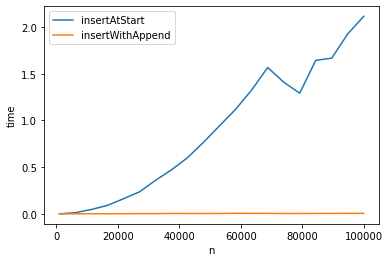

In [7]:
plt.plot(n_grid,t1s,label="insertAtStart")
plt.plot(n_grid,t2s,label="insertWithAppend")
plt.xlabel("n")
plt.ylabel("time")
plt.legend()
plt.show()